In [11]:
from os import path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

sns.set()
plt.gcf().set_facecolor('white')

<Figure size 432x288 with 0 Axes>

In [ ]:
filename = 'dataset.h5'
keyname = '20simpleHam_noise'
filepath = path.abspath(path.join(path.dirname("evaluation.py"), "..", "..", f"main/data/{filename}"))
# Load a single chunk => much faster
dataset = pd.read_hdf(filepath,keyname)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X,y= np.array(dataset["spectrum"].tolist()),np.array([dataset["aFieldStrength"].tolist(),dataset["b"].tolist(),dataset["c"].tolist()])
X_noise_1 = np.array(dataset["noise_spectrum_01"].tolist())
X_noise_3 = np.array(dataset["noise_spectrum_03"].tolist())
X_noise_5 = np.array(dataset["noise_spectrum_05"].tolist())
# only scale parameters not spectra
sc0,sc1,sc2 = StandardScaler().fit(y[0].reshape(-1,1)),StandardScaler().fit(y[1].reshape(-1,1)),StandardScaler().fit(y[2].reshape(-1,1))
# concatenate scaled parameters and split into training and test set
y = np.array([sc0.transform(y[0].reshape(-1,1)),sc1.transform(y[1].reshape(-1,1)),sc2.transform(y[2].reshape(-1,1))]).T.reshape(-1,3)
# Split in test and train_set, make sure to use same randomstate_ as before during training
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
_, X_test_n1, _, _ = train_test_split(X_noise_1,y, test_size=0.2, random_state=42)
_, X_test_n3, _, _ = train_test_split(X_noise_3,y, test_size=0.2, random_state=42)
_, X_test_n5, _, _ = train_test_split(X_noise_5,y, test_size=0.2, random_state=42)

In [26]:
# ################### EVALUATION OF MODEL ######################
# Load respective models
model = tf.keras.models.load_model('trained_models/mlp_mae_mape')
model.summary()
model_sn1 = tf.keras.models.load_model('trained_models/simple_mlp_sn1')
model_sn1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3276)              0         
                                                                 
 dense (Dense)               (None, 100)               327700    
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 3)                 303       
                                                                 
Total params: 338,103
Trainable params: 338,103
Non-trainable params: 0
_________________________________________________________________
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (

63/63 [==============================] - 0s 3ms/step


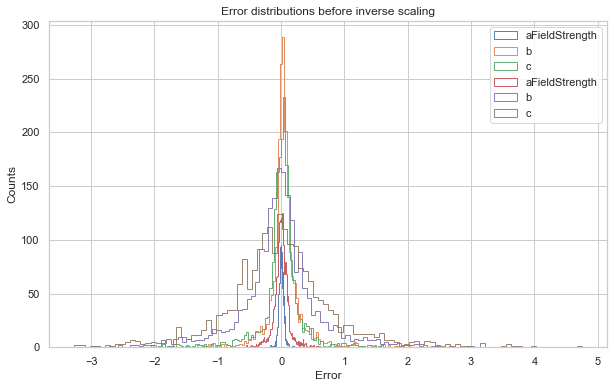

In [29]:
y_pred = model.predict(X_test)
absoluteerror = y_pred-y_test

plt.figure(figsize=(10,6), facecolor='white')
plt.hist(absoluteerror.T[0],bins=100,alpha = 0.9,label = 'aFieldStrength',histtype = 'step')
plt.hist(absoluteerror.T[1],bins=100,alpha = 0.9,label = 'b',histtype = 'step')
plt.hist(absoluteerror.T[2],bins=100,alpha = 0.9,label = 'c',histtype = 'step')

y_pred = model_sn1.predict(X_test_n1)
absoluteerror = y_pred-y_test

#plt.figure(figsize=(10,6), facecolor='white')
plt.hist(absoluteerror.T[0],bins=100,alpha = 0.9,label = 'aFieldStrength',histtype = 'step')
plt.hist(absoluteerror.T[1],bins=100,alpha = 0.9,label = 'b',histtype = 'step')
plt.hist(absoluteerror.T[2],bins=100,alpha = 0.9,label = 'c',histtype = 'step')


plt.title('Error distributions before inverse scaling')
plt.xlabel('Error')
plt.ylabel('Counts')
plt.legend()
plt.show()

63/63 [==============================] - 0s 2ms/step


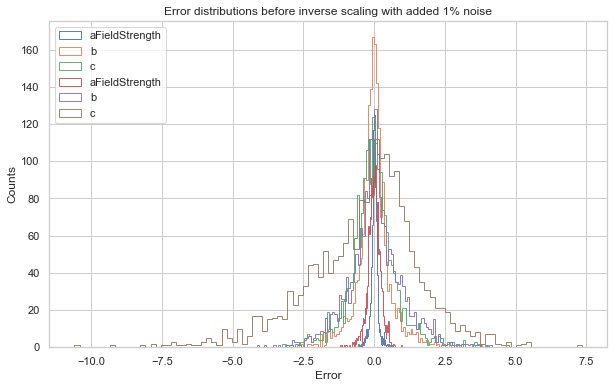

In [30]:
y_pred = model_sn1.predict(X_test_n1)
absoluteerror = y_pred-y_test

plt.figure(figsize=(10,6), facecolor='white')
plt.hist(absoluteerror.T[0],bins=100,alpha = 0.9,label = 'aFieldStrength',histtype = 'step')
plt.hist(absoluteerror.T[1],bins=100,alpha = 0.9,label = 'b',histtype = 'step')
plt.hist(absoluteerror.T[2],bins=100,alpha = 0.9,label = 'c',histtype = 'step')

y_pred = model.predict(X_test_n1)
absoluteerror = y_pred-y_test

#plt.figure(figsize=(10,6), facecolor='white')
plt.hist(absoluteerror.T[0],bins=100,alpha = 0.9,label = 'aFieldStrength',histtype = 'step')
plt.hist(absoluteerror.T[1],bins=100,alpha = 0.9,label = 'b',histtype = 'step')
plt.hist(absoluteerror.T[2],bins=100,alpha = 0.9,label = 'c',histtype = 'step')
plt.title('Error distributions before inverse scaling with added 1% noise')
plt.xlabel('Error')
plt.ylabel('Counts')
plt.legend()
plt.show()

63/63 [==============================] - 0s 2ms/step


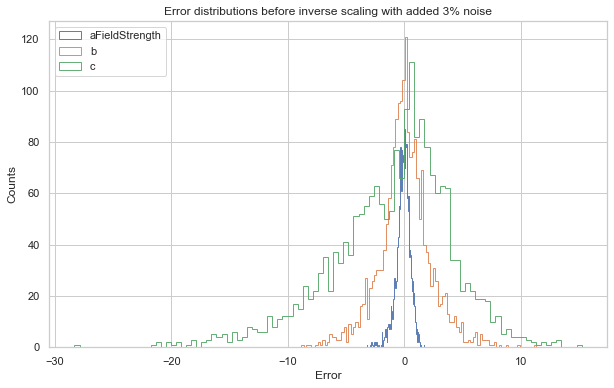

In [23]:
plt.show()
y_pred = model.predict(X_test_n3)
absoluteerror = y_pred - y_test

plt.figure(figsize=(10, 6), facecolor='white')
plt.hist(absoluteerror.T[0], bins=100, alpha=0.9, label='aFieldStrength', histtype='step')
plt.hist(absoluteerror.T[1], bins=100, alpha=0.9, label='b', histtype='step')
plt.hist(absoluteerror.T[2], bins=100, alpha=0.9, label='c', histtype='step')
plt.title('Error distributions before inverse scaling with added 3% noise')
plt.xlabel('Error')
plt.ylabel('Counts')
plt.legend()
plt.show()

63/63 [==============================] - 0s 2ms/step


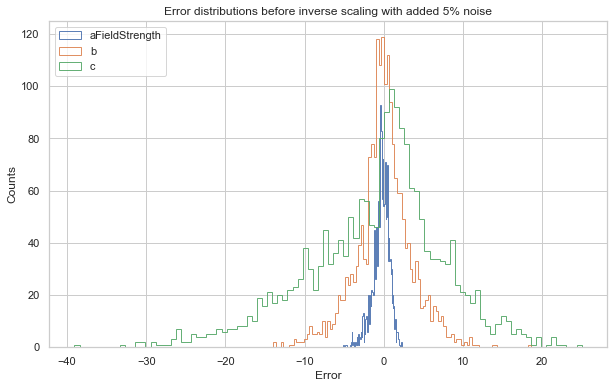

In [24]:
plt.show()
y_pred = model.predict(X_test_n5)
absoluteerror = y_pred - y_test

plt.figure(figsize=(10, 6), facecolor='white')
plt.hist(absoluteerror.T[0], bins=100, alpha=0.9, label='aFieldStrength', histtype='step')
plt.hist(absoluteerror.T[1], bins=100, alpha=0.9, label='b', histtype='step')
plt.hist(absoluteerror.T[2], bins=100, alpha=0.9, label='c', histtype='step')
plt.title('Error distributions before inverse scaling with added 5% noise')
plt.xlabel('Error')
plt.ylabel('Counts')
plt.legend()
plt.show()